# 文字探勘實作

## 產生 2-gram

In [26]:
input_sentence='那我們酸民婉君也可以報名嗎'

sentence  = input_sentence.decode('utf-8')

for i in range(0, len(sentence) - 2 + 1):
    print sentence[i:i+2]

那我
我們
們酸
酸民
民婉
婉君
君也
也可
可以
以報
報名
名嗎


## 產生 3-gram

In [27]:
for i in range(0, len(sentence) -3 + 1):
    print sentence[i:i+3]

那我們
我們酸
們酸民
酸民婉
民婉君
婉君也
君也可
也可以
可以報
以報名
報名嗎


## 建立 n-gram 函式

In [28]:
def ngram(input_sentence, n = 2):
    word_dic = {}
    sentence  = input_sentence.decode('utf-8')
    for i in range(0, len(sentence) - n + 1):
        if sentence[i:i+n] not in word_dic:
            word_dic[sentence[i:i+n]] = 1
        else:
            word_dic[sentence[i:i+n]] = word_dic[sentence[i:i+n]] + 1
    return word_dic

## 測試 bigram

In [29]:
for word in ngram('酸民婉君也可以報名嗎'):
    print word,

婉君 報名 可以 名嗎 君也 也可 民婉 酸民 以報


## 測試 trigram

In [30]:
for word in ngram('那我們酸民婉君也可以報名嗎?' ,n=3):
    print word

酸民婉
君也可
名嗎?
可以報
也可以
們酸民
以報名
民婉君
報名嗎
那我們
婉君也
我們酸


## 移除標點符號

In [31]:
sentence = '123?'
skip_word = '.?'
len([word for word in sentence if word in skip_word]) > 0

True

In [32]:
skip_dic = '?.,、　「！】？：《」》～【'.decode('utf-8')
def ngram(input_sentence, n = 2, skip_word= skip_dic):
    word_dic = {}
    sentence  = input_sentence.decode('utf-8')
    for i in range(0, len(sentence) - n + 1):
        invalid = len([word for word in sentence[i:i+n] if word in skip_word])
        if sentence[i:i+n] not in word_dic and invalid ==0:
            word_dic[sentence[i:i+n]] = 1
        elif invalid ==0:
            word_dic[sentence[i:i+n]] = word_dic[sentence[i:i+n]] + 1
    return word_dic

In [33]:
for word in ngram('那我們酸民、婉君也可以報名嗎?'):
    print word

我們
婉君
報名
們酸
可以
名嗎
君也
也可
那我
酸民
以報


In [34]:
import sqlite3
db = sqlite3.connect('news.db') 
cur = db.cursor()
cur.execute('select * from news_entry')
allNews = cur.fetchall()
dic = {}
for rec in allNews:
    ngram_dic = ngram(rec[4].encode('utf-8'))
    for ele in ngram_dic:
        if ele not in dic:
            dic[ele] = ngram_dic[ele]
        else:
            dic[ele] = dic[ele] + ngram_dic[ele]
cur.close()
db.close()

OperationalError: no such table: news_entry

In [35]:
import operator
words_freq = sorted(dic.iteritems(),key=operator.itemgetter(1),reverse=True)
    
for word in words_freq:
    if word[1] >= 2:
        print word[0], word[1]

NameError: name 'dic' is not defined

## 長詞優先演算法

## 如何依標點符號切開字詞

In [36]:
import re
delimiter = "，|。|、"  
text = '3年前就讀高雄應用大學二年級的陳顯佳，為閃避跨越雙黃線來車，撞上路邊、摔斷頸椎，頸部以下全癱，嘴被插管，父母每天去看他，他都意識清醒、眨眼流淚，17天後他因頸椎受損抑制呼吸，醫師用盡強力針與電擊都無效，'
for i in re.split(delimiter, text):
    print i

3年前就讀高雄應用大學二年級的陳顯佳
為閃避跨越雙黃線來車
撞上路邊
摔斷頸椎
頸部以下全癱
嘴被插管
父母每天去看他
他都意識清醒
眨眼流淚
17天後他因頸椎受損抑制呼吸
醫師用盡強力針與電擊都無效



## 測試切除效果

In [37]:
def splitSentense(text, delimiter):
    return re.split(delimiter, text)
    
delimiter = "，|。|、|（|）|／|《|》|】|【|「|」|；|：".decode('utf-8')  
db = sqlite3.connect('news.db') 
cur = db.cursor()
cur.execute('select * from news_entry')
allNews = cur.fetchall()
sentenceAry = []
for rec in allNews:
    text = rec[5]
    sentenceAry += splitSentense(text,delimiter)
cur.close()
db.close()

OperationalError: no such table: news_entry

In [38]:
for sentence in sentenceAry[0:8]:
    print sentence

NameError: name 'sentenceAry' is not defined

## 移除關鍵字

In [39]:
def removeKey(text, keyword):
    textAry= text
    for key in keyword:
        textAry = ''.join(textAry.split(key.decode('utf-8')))
    return textAry
print sentenceAry[0]
print removeKey(sentenceAry[0], ['民進黨', '後天'])

NameError: name 'sentenceAry' is not defined

In [ ]:
a = '民進黨後天將公布'.decode('utf-8')
removeKey(a, ['民進黨', '後天'])

## 修改ngram 處理函式

In [ ]:
def ngram(input_sentence, n = 2):
    word_dic = {}
    sentence  = input_sentence
    for i in range(0, len(sentence) - n + 1):        
        if sentence[i:i+n] not in word_dic:
            word_dic[sentence[i:i+n]] = 1
        else:
            word_dic[sentence[i:i+n]] = word_dic[sentence[i:i+n]] + 1
    return word_dic

## 依長詞優先產生關鍵字

In [ ]:
keywords=[]        
ret_terms={}
words_freq    = []
for term_length in range(4,1,-1):
    word_dic = {}
    for sentence in sentenceAry:
        text_list = removeKey(sentence,keywords)        
        ngram_words = ngram(text_list,term_length) 
        for word in ngram_words:
            if word not in word_dic:
                word_dic[word] = 1
            else:
                word_dic[word] += ngram_words[word]   
    for word in word_dic:
        if word_dic[word] >= 5:
            keywords.append(word.encode('utf-8'))            
            ret_terms.update({word:word_dic[word]})

sorted_terms = sorted(ret_terms.iteritems(),key=operator.itemgetter(1),reverse=True) 
for term in sorted_terms[0:30]:
    print term[0], term[1]

## 使用jieba

In [ ]:
import jieba

sentence = "大巨蛋案對市府同仁下封口令？　柯P否認"
words = jieba.cut(sentence, cut_all=False)
for word in words:
    print word

## 使用jieba 分詞

In [ ]:
#encoding=utf-8
import jieba

seg_list = jieba.cut("大巨蛋案對市府同仁下封口令？　柯P否認", cut_all=True)
print "Full Mode:", "/ ".join(seg_list) 

seg_list = jieba.cut("大巨蛋案對市府同仁下封口令？　柯P否認", cut_all=False)
print "Default Mode:", "/ ".join(seg_list) 

## 使用自訂辭典

In [ ]:
import jieba

jieba.load_userdict("userdict.txt")

## 新增或刪除字詞

In [ ]:
import jieba
jieba.add_word('柯P',100, 'nr')
#jieba.del_word('柯P')

## 表列詞性

In [ ]:
import jieba.posseg as pseg
words = pseg.cut("大巨蛋案對市府同仁下封口令？　柯P否認")
for w in words:
    print w.word, w.flag

## 列出關鍵字所在

In [ ]:
words = jieba.tokenize(unicode(sentence, 'utf-8'))

for tw in words:
    print tw[0], tw[1], tw[2]

## 依詞性切出關鍵詞

In [ ]:
import jieba.analyse
tags = jieba.analyse.extract_tags(sentence, 1, allowPOS = ['nr'])
print ",".join(tags)


## 列出斷詞位置

In [ ]:
words = jieba.tokenize(unicode(sentence, 'utf-8'))

for tw in words:
    print tw[0], tw[1], tw[2]

## 表列關鍵詞

In [ ]:
import jieba.analyse
sentence = "根據歐洲電商組織(Ecommerce Europe) 最新消息得知，\
該集團積極讓歐洲的包裹遞送服務與電商領域有更緊密結合。如此一來，\
便可解決電商物流的障礙。此組織總共結合歐洲 16 國的電商協會，\
目標整合歐洲的包裹物流市場，讓商品跨境更為順暢"
tags = jieba.analyse.extract_tags(sentence)
print '/'.join(tags)

jieba.analyse.set_stop_words("stopword.txt")

## 生成文字雲

In [ ]:
import requests
from bs4 import BeautifulSoup
import re
import jieba
section = requests.get('http://www.appledaily.com.tw/realtimenews/section/new/1')
soup = BeautifulSoup(section.text)
domain = 'http://www.appledaily.com.tw'
worddic = {}
for news in soup.select('.rtddt'):    
    main = news.select('h1')[0].text
    m = re.match('(.*)\((\d+)\)',main)
    if m:
        title = m.group(1)
        popularity = int(m.group(2))
    for wd in jieba.cut(title):
        if wd not in worddic:
            worddic[wd] = 1
        else:
            worddic[wd] = worddic[wd] + 1


In [ ]:
from pytagcloud import create_tag_image, make_tags
from IPython.display import Image
from operator import itemgetter
swd = sorted(worddic.iteritems(), key=itemgetter(1), reverse=True)
swd = [w for w in swd[1:50] if w[0] not in '【】...'.decode('utf-8')]

tags = make_tags(swd, maxsize=120)
create_tag_image(tags, 'wc.png', size=(600,400), fontname='SimHei')
Image(filename='wc.png') 


In [ ]:
import requests
from bs4 import BeautifulSoup
import re
import jieba
section = requests.get('http://www.appledaily.com.tw/realtimenews/section/new/1')
soup = BeautifulSoup(section.text)
domain = 'http://www.appledaily.com.tw'
worddic = {}
for news in soup.select('.rtddt'):    
    main = news.select('h1')[0].text
    m = re.match('(.*)\((\d+)\)',main)
    if m:
        title = m.group(1)
        popularity = int(m.group(2))
    for wd in jieba.analyse.extract_tags(title):
        if wd not in worddic:
            worddic[wd] = 1
        else:
            worddic[wd] = worddic[wd] + 1


## 使用pytagcloud

In [ ]:
from pytagcloud import create_tag_image, make_tags
from IPython.display import Image
from operator import itemgetter
swd = sorted(worddic.iteritems(), key=itemgetter(1), reverse=True)
swd = [w for w in swd[1:50]]

tags = make_tags(swd, maxsize=120)
create_tag_image(tags, 'wc.png', size=(600,400), fontname='SimHei')
Image(filename='wc.png') 


In [ ]:
from pytagcloud import create_tag_image, make_tags
from IPython.display import Image
from operator import itemgetter
swd = sorted(worddic.iteritems(), key=itemgetter(1), reverse=True)
swd = [w for w in swd[1:50]]

## 使用 tagcanvas

In [ ]:
from IPython.display import display, HTML 

page= '''
  <head>
    <title>Word Cloud</title>
    <script src="tagcanvas.min.js" type="text/javascript"></script>
  </head>
  <body>
    <h1>Word Cloud</h1>
    <div id="myCanvasContainer">
      <canvas width="300" height="300" id="myCanvas">
        <p>Anything in here will be replaced on browsers that support the canvas element</p>
      </canvas>
    </div>
    <div id="tags"><ul id="weightTags">%s</ul></div>
  </body>
'''

js = '''
TagCanvas.Start('myCanvas','weightTags', {
 textFont: null,
 textColour: null,
 weight: true,
 weightMode: 'both',
 textFont: 'Impact,"Arial Black",sans-serif',
 /* more options */
 
});
$('#tags').css('display','None');
'''

import IPython
from IPython.core.display import display_html, display_javascript, Javascript

js_libs = ['tagcanvas.min.js']
li_str = ''
for li in swd:
    li_str += '<li><a data-weight="10" style="font-size: %dex">%s</a></li>'%(li[1] , li[0])
    
display_html(IPython.core.display.HTML(data=page%(li_str)))
display_javascript( Javascript(data=js, lib= js_libs))

## TF-IDF

In [40]:
import jieba
ary = ['【更新】柯P：洪智坤洩漏公文案還沒看到公文　今處理',
'留洪智坤 柯：殘障求職不易',
'人事處議處洪智坤　柯P：不清楚議處結果']
corpus = []
for title in ary:
    corpus.append(' '.join(jieba.cut(title)))

jieba.add_word('洪智坤',100, 'nr')

In [41]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer() 
X = vectorizer.fit_transform(corpus)
word = vectorizer.get_feature_names() 
for w in word:
    print w

不易
人事
今處理
公文
更新
案還
殘障
求職
洩漏
洪智坤
清楚
留洪智坤
看到
結果
處議
議處


In [69]:
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer()
tfidf = transformer.fit_transform(X)
weight = tfidf.toarray()    
# print weight
print tfidf


  (0, 4347)	0.254443683779
  (0, 5686)	0.172982331747
  (0, 6359)	0.146961402446
  (0, 4296)	0.239772224518
  (0, 3304)	0.254443683779
  (0, 4534)	0.147901306479
  (0, 7461)	0.181535887301
  (0, 641)	0.22128837183
  (0, 109)	0.196207346562
  (0, 129)	0.204281633244
  (0, 471)	0.254443683779
  (0, 1192)	0.254443683779
  (0, 6986)	0.254443683779
  (0, 3805)	0.254443683779
  (0, 4724)	0.209113369312
  (0, 4010)	0.254443683779
  (0, 3717)	0.239772224518
  (0, 2308)	0.214691199251
  (0, 4194)	0.239772224518
  (0, 922)	0.22128837183
  (1, 4828)	0.221318941845
  (1, 4913)	0.275664561512
  (1, 6190)	0.216701602095
  (1, 4352)	0.248491751679
  (1, 1839)	0.25976948672
  :	:
  (830, 641)	0.239816497909
  (831, 3323)	0.235294616154
  (831, 105)	0.235294616154
  (831, 266)	0.235294616154
  (831, 180)	0.235294616154
  (831, 7021)	0.235294616154
  (831, 70)	0.235294616154
  (831, 2387)	0.212101152966
  (831, 211)	0.221727309927
  (831, 169)	0.212101152966
  (831, 167)	0.204634525548
  (831, 32)	0.221

## 計算Cosine Similarity

In [43]:
from sklearn.metrics.pairwise import linear_kernel
cosine_similarities = linear_kernel(tfidf[0], tfidf).flatten()
print cosine_similarities

[ 1.          0.          0.07912735]


## 列出最相關文章

In [44]:
related_docs_indices = cosine_similarities.argsort()[:-3:-1]
related_docs_indices
for index in related_docs_indices:
    print ary[index]

【更新】柯P：洪智坤洩漏公文案還沒看到公文　今處理
人事處議處洪智坤　柯P：不清楚議處結果


## 分析6/17 新聞內容

In [45]:
from xml.dom import minidom
from xml.etree import ElementTree
import jieba.analyse

f = open('1434435247.xml', 'r')
events=ElementTree.fromstring(f.read())
f.close()
corpus = []
ary= []
for elem in events.findall('./channel/item'):
    guid = elem.find('guid').text
    title = elem.find('title').text
    description = elem.find('description').text
    pubDate = elem.find('pubDate').text
    source = elem.find('source').text
    ary.append(title)
    corpus.append(' '.join(jieba.analyse.extract_tags(description, 20)))

In [46]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer() 
X = vectorizer.fit_transform(corpus)
word = vectorizer.get_feature_names() 


In [66]:
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer()
tfidf = transformer.fit_transform(X)
weight = tfidf.toarray() 
print weight

[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


In [50]:
from sklearn.metrics.pairwise import linear_kernel
cosine_similarities = linear_kernel(tfidf[0], tfidf).flatten()
# print cosine_similarities

[ 1.          0.          0.          0.          0.          0.          0.
  0.          0.02416427  0.          0.          0.02305006  0.
  0.02051457  0.          0.          0.          0.02170186  0.          0.
  0.          0.          0.03182717  0.0234633   0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.0310064
  0.          0.          0.0475188   0.          0.          0.          0.
  0.          0.          0.0228061   0.          0.          0.02111917
  0.          0.          0.          0.          0.0247604   0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.02222974
  0.          0.02313953  0.          0.          0.          0.
  0.02406637  0.          0.          0.          0.          0.          0.
  0.          0.07723495

In [49]:
from sklearn.metrics.pairwise import linear_kernel
n_cosine_similarities = linear_kernel(tfidf[0:10], tfidf[0:10])
#print cosine_similarities
print n_cosine_similarities.shape

(10, 10)


## 使用 HeatMap 視覺化相似程度

In [60]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
# pip install seaborn
sns.heatmap(n_cosine_similarities, annot=True, center=0, cmap='coolwarm')

ImportError: No module named seaborn

In [ ]:
related_docs_indices = cosine_similarities.argsort()[:-10:-1]
print related_docs_indices
for index in related_docs_indices:
    print ary[index]

In [ ]:
from sklearn.metrics.pairwise import linear_kernel
n_cosine_similarities = linear_kernel(tfidf, tfidf)
#print cosine_similarities

## 使用PCA 降維資料

In [65]:
from sklearn import cluster
c = cluster.KMeans(n_cosine_similarities,3)
print c.n_clusters

import numpy as np
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
a = pca.fit(n_cosine_similarities)
print a.shape

[[ 1.          0.          0.          0.          0.          0.          0.
   0.          0.02416427  0.        ]
 [ 0.          1.          0.          0.          0.          0.14021852
   0.038673    0.          0.01747556  0.        ]
 [ 0.          0.          1.          0.          0.          0.          0.
   0.          0.04299854  0.        ]
 [ 0.          0.          0.          1.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.          0.          0.          0.          1.          0.          0.
   0.          0.          0.        ]
 [ 0.          0.14021852  0.          0.          0.          1.
   0.0706901   0.          0.01712003  0.        ]
 [ 0.          0.038673    0.          0.          0.          0.0706901
   1.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.          0.
   1.          0.          0.        ]
 [ 0.02416427  0.01747556  0.04299854  0.        

AttributeError: 'PCA' object has no attribute 'shape'

In [52]:
from sklearn import cluster
pca = PCA(n_components=2)
pca_data = pca.fit_transform(n_cosine_similarities)

print pca_data.shape

(10, 2)


In [53]:
print weight.shape

(832, 7697)


In [68]:
param = [{'model':cluster.KMeans(n_clusters=4),
          'title':'KMeans'}]
c = param[0]['model']
k_data = c.fit_predict(weight)
print weight
print c
# print k_data

[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=4, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)


## 檢視資料與Sum of Square

In [55]:
print k_data.shape
print c.inertia_

(832,)
808.880296082


In [56]:
print k_data

[3 3 2 3 3 3 3 3 0 3 3 3 3 3 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 1 1 1
 3 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 3 3 3 0 3 3 1 3 3 3 3 3 3 3 3 0 3
 3 0 3 1 1 1 3 3 3 0 3 3 3 3 0 0 3 3 3 3 3 3 3 3 2 3 3 3 3 0 3 3 0 0 3 3 3
 3 3 0 3 3 0 3 3 3 3 3 3 3 3 3 3 3 3 0 2 3 0 3 3 3 1 1 1 1 3 1 1 0 3 3 3 3
 3 0 0 3 3 3 3 3 0 3 3 0 3 3 3 3 3 2 3 3 2 2 3 2 3 0 3 3 3 3 3 3 2 3 3 3 3
 3 0 3 3 2 3 3 3 3 3 0 3 3 3 0 3 0 3 3 3 3 3 1 1 3 1 1 1 3 3 1 1 1 1 3 1 1
 1 1 1 3 1 1 3 3 3 3 3 2 3 0 2 3 3 3 0 0 3 3 2 3 3 3 0 3 3 3 3 2 3 0 3 2 3
 3 3 0 3 3 3 3 3 3 0 3 3 3 3 3 3 3 3 3 3 3 3 2 3 0 3 3 3 3 3 3 3 2 1 1 1 1
 1 1 1 1 2 1 1 1 1 3 0 0 3 2 2 0 3 3 3 3 3 3 3 2 3 0 0 3 3 3 3 3 3 3 3 3 0
 3 3 3 3 3 2 3 3 3 0 3 3 3 0 3 3 3 2 3 2 0 3 3 3 3 3 3 0 3 3 3 3 3 3 1 3 1
 1 1 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 3 2 0 3 3 3 3 2 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 3 3 3
 3 3 3 3 3 3 3 3 1 3 1 1 3 3 1 0 3 0 3 3 3 3 3 3 3 3 3 3 0 3 3 3 1 1 3 1 1
 1 3 3 3 3 3 3 2 3 3 3 3 

## 視覺化呈現分群結果

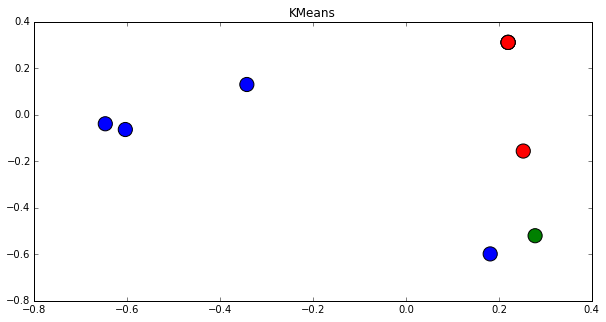

In [61]:
fig, axes = plt.subplots(ncols=1, nrows=1,figsize=(10,5))
axes.scatter(pca_data[:,0], pca_data[:,1], c=['rgbyc'[i] for i in k_data ], s=200)
axes.set_title(param[0]['title'])

In [70]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df=1)
content = ["How to format my hard disk", " Hard disk format problems "]
X = vectorizer.fit_transform(content)
print vectorizer.get_feature_names()
print(X.toarray().transpose())


[u'disk', u'format', u'hard', u'how', u'my', u'problems', u'to']
[[1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 0]
 [0 1]
 [1 0]]


In [ ]:
import os

posts = [open(os.path.join('toy/', f)).read() for f in os.listdir('toy')]

from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df=1)

X_train = vectorizer.fit_transform(posts)
num_samples, num_features = X_train.shape

print("#samples: %d, #features: %d" % (num_samples,num_features)) 
print(vectorizer.get_feature_names())


In [ ]:
new_post = "imaging databases"
new_post_vec = vectorizer.transform([new_post])
print new_post_vec
print(new_post_vec.toarray())


In [ ]:
import scipy as sp
def dist_raw(v1, v2):
    delta = v1-v2
    return sp.linalg.norm(delta.toarray())


In [ ]:
import sys
best_doc = None
best_dist = sys.maxint
best_i = None
for i in range(0, num_samples):
    post = posts[i]
    if post==new_post:
        continue
    post_vec = X_train.getrow(i)
    d = dist_raw(post_vec, new_post_vec)
    print "=== Post %i with dist=%.2f: %s"%(i, d, post)
    if d<best_dist:
        best_dist = d
        best_i = i
print("Best post is %i with dist=%.2f"%(best_i, best_dist))


In [ ]:
def dist_norm(v1, v2):
    v1_normalized = v1/sp.linalg.norm(v1.toarray())
    v2_normalized = v2/sp.linalg.norm(v2.toarray())
    delta = v1_normalized - v2_normalized
    return sp.linalg.norm(delta.toarray())


In [ ]:
vectorizer = CountVectorizer(min_df=1, stop_words='english')
sorted(vectorizer.get_stop_words())[0:10]


In [ ]:
import nltk.stem
s= nltk.stem.SnowballStemmer('english')
s.stem("graphics")

s.stem("imaging")
s.stem("image")
s.stem("imagination")
s.stem("imagine")



In [ ]:
import nltk.stem
english_stemmer = nltk.stem.SnowballStemmer('english')
class StemmedCountVectorizer(CountVectorizer):
    def build_analyzer(self):
        analyzer = super(StemmedCountVectorizer, self).build_analyzer()
        return lambda doc: (english_stemmer.stem(w) for w in analyzer(doc))
vectorizer = StemmedCountVectorizer(min_df=1, stop_words='english')
